# Linear Regression with Statsmodels


In the first notebooks of this repository, we have worked with the library `scikit-learn` to train linear regression models. In this notebook we want to introduce another library that can be used for this purpose: `statsmodels`. 

The question which library to choose is closely related to your objective. Here are some of the advantages and areas of application for both libraries:

**scikit-learn:**

* offers wide variety of models and algorithms not only for regression but also for classification, dimensionality reduction, clustering, etc. 
* clean and easy to learn syntax 
* emphasis on predictive modeling rather than descriptive statistics 
* offers tools for transformation pipelines


**statsmodels:**

* versatile module for complex statistics
* offers powerful statistics and econometric tools 
* good for fitting statistical models, conducting statistical test or data exploration
* emphasis on understanding relevant variables and their effect size
* useful for time series 



As you can see both libraries have their advantages. In a nutshell, if you want to analyze your data (e.g. check the statistical significance of different variables for your model), stasmodels is the right choice. If your focus is on fitting a good model and making predictions, scikit-learn is the better choice.


## Learning Objectives

In this notebook you will learn…

* how to use statsmodels for training a linear regression model.
* how to interpret the most important metrics of the model summary.

## The Cars Dataset



We will stick to the at this point hopefully well known cars dataset to train a simple and a multiple linear regression with statsmodels.

In [11]:
# Import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [2]:
# Using the same car dataset as before
cars = pd.read_csv("data/cars_multivariate.csv")
cars.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino


## Simple Linear Regression



For our simple linear regression we will model our target variable `mpg` with the feature `horsepower`. 

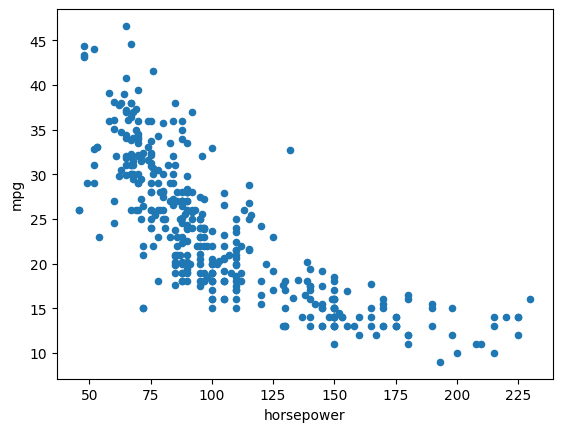

In [3]:
# Plot relationship between horsepower and mpg 
cars.plot('horsepower', 'mpg', kind='scatter');

As usually we need to prepare our data by defining the target and feature(s). In contrast to `scikit-learn`, `statsmodels` does not add a constant term for calculating the intercept per default. If you check the documentation for [sklearn.linear_model.LinearRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html), you will see that one of its parameters is called `fit_intercept` and its default value equals `True`. When using [statsmodels OLS](https://www.statsmodels.org/dev/generated/statsmodels.regression.linear_model.OLS.html) we need to manually add a constant term, if we want our model to be fitted with an intercept.

In [4]:
# Define target and feature and add constant term
X = cars.horsepower
X = sm.add_constant(X)
y = cars.mpg

X.head()

,const,horsepower
0,1.0,130.0
1,1.0,165.0
2,1.0,150.0
3,1.0,150.0
4,1.0,140.0


In [5]:
# Fit model and print summary
model = sm.OLS(y, X)
results = model.fit()

# Print intercept and coefficients
results.params

const         39.935861
horsepower    -0.157845
dtype: float64

As you can see the syntax is slightly different, but it yields the same results. One function that makes `statsmodel` incredibly useful for statistic analyses, is the `.summary` which you can print for each model. It gives you an overview over (nearly) all imaginable metrics and statistical figures you might need. At the beginning this can be pretty overwhelming.  

In [6]:
# Print extensive summary
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.606
Model:                            OLS   Adj. R-squared:                  0.605
Method:                 Least Squares   F-statistic:                     599.7
Date:                Tue, 18 Feb 2025   Prob (F-statistic):           7.03e-81
Time:                        23:25:27   Log-Likelihood:                -1178.7
No. Observations:                 392   AIC:                             2361.
Df Residuals:                     390   BIC:                             2369.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         39.9359      0.717     55.660      0.000      38.525      41.347
horsepower    -0.1578      0.006    -24.489      0.000      -0.171      -0.145
==============================================================================
Omnibus:                       16.432   Durbin-Watson:                   0.920
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               17.305
Skew:                           0.492   Prob(JB):                     0.000175
Kurtosis:                       3.299   Cond. No.                         322.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Model Interpretation



We will only briefly talk about this summary. For a more extensive explanation of all of the metrics within the model summary check the end of the notebook.

<center><img src="images/ols_summary.png" height="400"/></center>

* The blue part of the table gives some specifics on the data and the model itself.
* The orange part provides information about the goodness of fit.
    * **$R^2$** 
    * **adjusted $R^2$**
* The green part gives information about the estimated coefficients of our model. 
    * **coef** are the value for intercept, which is the coefficient for the constant, as well as coefficients for each feature 
    * **P>|t|** is one of the most important statistics in the summary. It uses the t-statistic to produce the p-value, a measurement of how likely your coefficient is measured through our model by chance.
* The turquoise part on the bottom provides information about the residuals, autocorrelation and multicollinearity. 

## Multiple Linear Regression



Also with `statsmodel` we can train a multiple linear regression with several features. 

In [7]:
# Define target and features and add a constant term 
X2 = cars[['horsepower', 'weight']]
X2 = sm.add_constant(X2)
y2 = cars.mpg

X2.head(n=2)

,const,horsepower,weight
0,1.0,130.0,3504.0
1,1.0,165.0,3693.0


In [8]:
# We can also combine all steps using dot notation
sm.OLS(y2, X2).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.706
Model:                            OLS   Adj. R-squared:                  0.705
Method:                 Least Squares   F-statistic:                     467.9
Date:                Tue, 18 Feb 2025   Prob (F-statistic):          3.06e-104
Time:                        23:26:57   Log-Likelihood:                -1121.0
No. Observations:                 392   AIC:                             2248.
Df Residuals:                     389   BIC:                             2260.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         45.6402      0.793     57.540      0.000      44.081      47.200
horsepower    -0.0473      0.011     -4.267      0.000      -0.069      -0.026
weight        -0.0058      0.001    -11.535      0.000      -0.007      -0.005
==============================================================================
Omnibus:                       35.336   Durbin-Watson:                   0.858
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               45.973
Skew:                           0.683   Prob(JB):                     1.04e-10
Kurtosis:                       3.974   Cond. No.                     1.15e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.15e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Predicting for new observations



Like `scikit-learn` `statsmodels` also has a `.predict` method to calculate values for new instances. Let's say we want to predict the `mpg` for a new car with `horsepower` of 250 and a `weight` of 3000. 
We can input our new data as a list but we need to make sure to add a constant of 1 for the intercept calculation. 

In [9]:
# Make predictions on test car
test_car = [1, 200, 3500]
sm.OLS(y2, X2).fit().predict(test_car)

array([15.90008745])

So according to our model a car with the above mentioned characteristics, would have a fuel efficiency of ~15.9 mpg. 

## The Formula Notation


Besides the syntax we've used above, we can also choose the so-called **formula notation**. It will yield the same results, only the code is different, it slightly resembles the R syntax.

In [10]:
# mpg explained by horsepower and weight
smf.ols(formula='mpg ~ horsepower + weight', data=cars).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.706
Model:                            OLS   Adj. R-squared:                  0.705
Method:                 Least Squares   F-statistic:                     467.9
Date:                Tue, 18 Feb 2025   Prob (F-statistic):          3.06e-104
Time:                        23:27:33   Log-Likelihood:                -1121.0
No. Observations:                 392   AIC:                             2248.
Df Residuals:                     389   BIC:                             2260.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     45.6402      0.793     57.540      0.000      44.081      47.200
horsepower    -0.0473      0.011     -4.267      0.000      -0.069      -0.026
weight        -0.0058      0.001    -11.535      0.000      -0.007      -0.005
==============================================================================
Omnibus:                       35.336   Durbin-Watson:                   0.858
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               45.973
Skew:                           0.683   Prob(JB):                     1.04e-10
Kurtosis:                       3.974   Cond. No.                     1.15e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.15e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Model Summary - Clearly explained...



Here is a brief description of the summary table. Don't worry, you don't have to know or understand them all right now.


#### The blue part of the table gives some specifics on the data and the model:


* **Dep. Variable**: Dependent variable (target)
* **Model**: Technique used, an abbreviated version of the method
* **Method**: The loss function optimized in the parameter selection process. Least Squares since it picks the parameters that reduce the training error. This is also known as Mean Square Error [MSE].
* **No. Observations**: Number of observations used to train the model / size of the training data
* **Df Residuals**: Degrees of freedom of the residuals, which is the number of observations – number of parameters. Intercept is a parameter. The purpose of Degrees of Freedom is to reflect the impact of descriptive/summarizing statistics in the model, which in regression is the coefficient. Since the observations must "live up" to these parameters, they only have so many free observations, and the rest must be reserved to "live up" to the parameters' prophecy. This internal mechanism ensures that there are enough observations to match the parameters.
* **Df Model**: Degrees of freedom model numbers our predicting variables.  The number of parameters in the model (not including the constant/intercept term if present)
* **Covariance Type**: Robust regression methods are designed to be not overly affected by violations of assumptions by the underlying data-generating process. Since this model is Ordinary Least Squares, it is non-robust and therefore highly sensitive to outliers.

#### The orange part of the table shows the goodness of fit:


* **R-squared**: The coefficient of determination. It quantifies the percent of variance in the target variable that is explained by the model. The remaining percentage represents the variance explained by error, the E-term, the part that model and predictors fail to grasp.
* **Adj. R-squared**: Version of the R-Squared that penalizes additional independent variables.
* **F-statistic**: A measure of how significant the fit is. The mean squared error of the model divided by the mean squared error of the residuals. Feeds into the calculation of the P-Value.
* **Prob (F-statistic) or P-Value**: The probability that a sample like this would yield the above statistic, and whether the model's verdict on the null hypothesis will consistently represent the population. Does not measure effect magnitude, instead measures the integrity and consistency of this test on this group of data.
* **Log-likelihood**: 
* **AIC**: The Akaike Information Criterion. Adjusts the log-likelihood based on the number of observations and the complexity of the model. Penalizes the model selection metrics when more independent variables are added.
* **BIC**: The Bayesian Information Criterion. Similar to the AIC, but has a higher penalty for models with more parameters. Penalizes the model selection metrics when more independent variables are added.


#### The green second table shows the coefficient report:


* **coef**: The estimated value of the coefficient. By how much the model multiplies the independent value by.
std err: The basic standard error of the estimate of the coefficient. Average distance deviation of the points from the model, which offers a unit relevant way to gauge model accuracy.
* **t**: The t-statistic value. This is a measure of how statistically significant the coefficient is.
* **P > |t|**: P-value that the null-hypothesis that the coefficient = 0 is true. If it is less than the confidence level, often 0.05, it indicates that there is a statistically significant relationship between the term and the response.
* **[95.0% Conf. Interval]**: The lower and upper values of the 95% confidence interval. Specific range of the possible coefficient values.


#### The turquoise third table provides information about residuals, autocorrelation, and multicollinearity:












* **Skewness**: A measure of the symmetry of the data about the mean. Normally-distributed errors should be symmetrically distributed about the mean (equal amounts above and below the line). The normal distribution has 0 skew.
* **Kurtosis**: A measure of the shape of the distribution. Compares the amount of data close to the mean with those far away from the mean (in the tails), so model "peakiness". The normal distribution has a Kurtosis of 3, and the greater the number, the more the curve peaks.
* **Omnibus D’Angostino’s test**: It provides a combined statistical test for the presence of skewness and kurtosis.
* **Prob(Omnibus)**: The above statistic turned into a probability
* **Jarque-Bera**: A different test of the skewness and kurtosis
* **Prob (JB)**: The above statistic turned into a probability
* **Durbin-Watson**: A test for the presence of autocorrelation (that the errors are not independent), which is often important in time-series analysis. It is also a measurement of homoscedasticity. A perfect value would be between 1 and 2. 
* **Cond. No**: Condition number; A test for multicollinearity (if in a fit with multiple parameters, the parameters are related to each other). Multicollinearity is strongly implied by a high condition number.